In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

In [2]:
def predator_prey(z,t,params):

    x = z[0]
    y = z[1]
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return [dxdt, dydt]

In [3]:
#The parameters `alpha`, `beta`, `gamma`, `delta` describes the interaction of two species.
alpha = 1.1
beta  = 0.4
delta = 0.1
gamma = 0.4
params = [alpha, beta, delta, gamma]

t = np.linspace(0, 100, 2500)

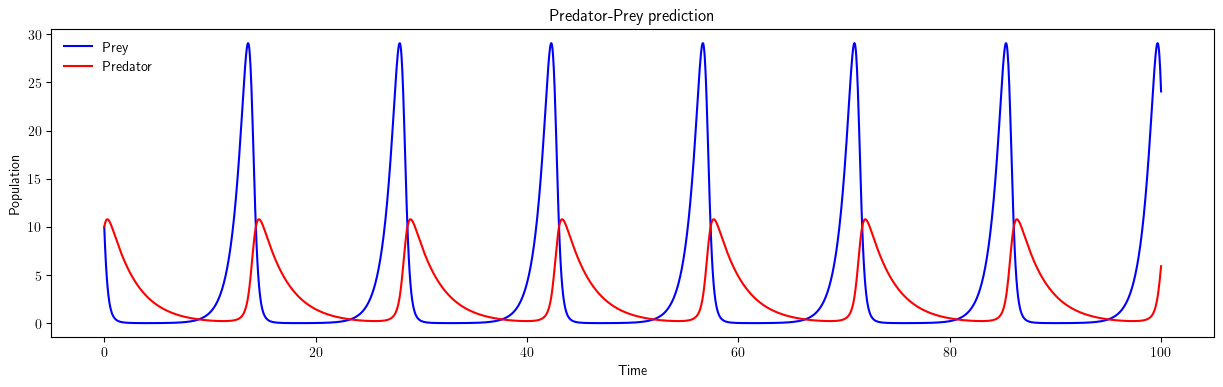

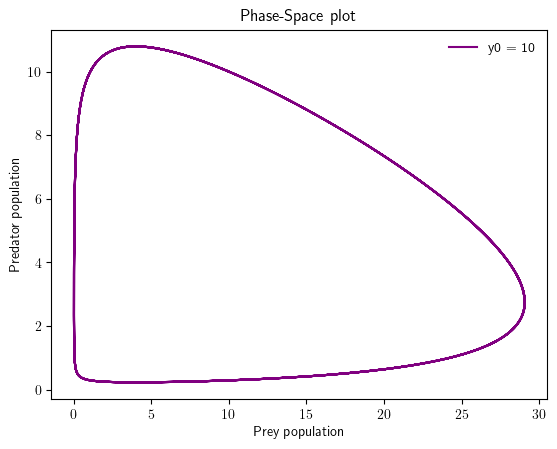

In [4]:
initial = [10, 10] #[initial_prey, initial_predator]

#Solve the ode system
model = odeint(predator_prey, initial, t, args=(params,))
x = model[:,0]
y = model[:,1]

fig1 = plt.figure(0, figsize=(15,4))
plt.plot(t, x, color = 'blue', label = 'Prey')
plt.plot(t, y, color = 'red', label = 'Predator ')
plt.title('Predator-Prey prediction')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best', frameon=False)

fig2 = plt.figure(2)
plt.plot(x,y, color = 'purple', label = 'y0 = %i'% initial[1])
plt.title('Phase-Space plot')
plt.xlabel('Prey population')
plt.ylabel('Predator population')
plt.legend(loc='best', frameon=False)

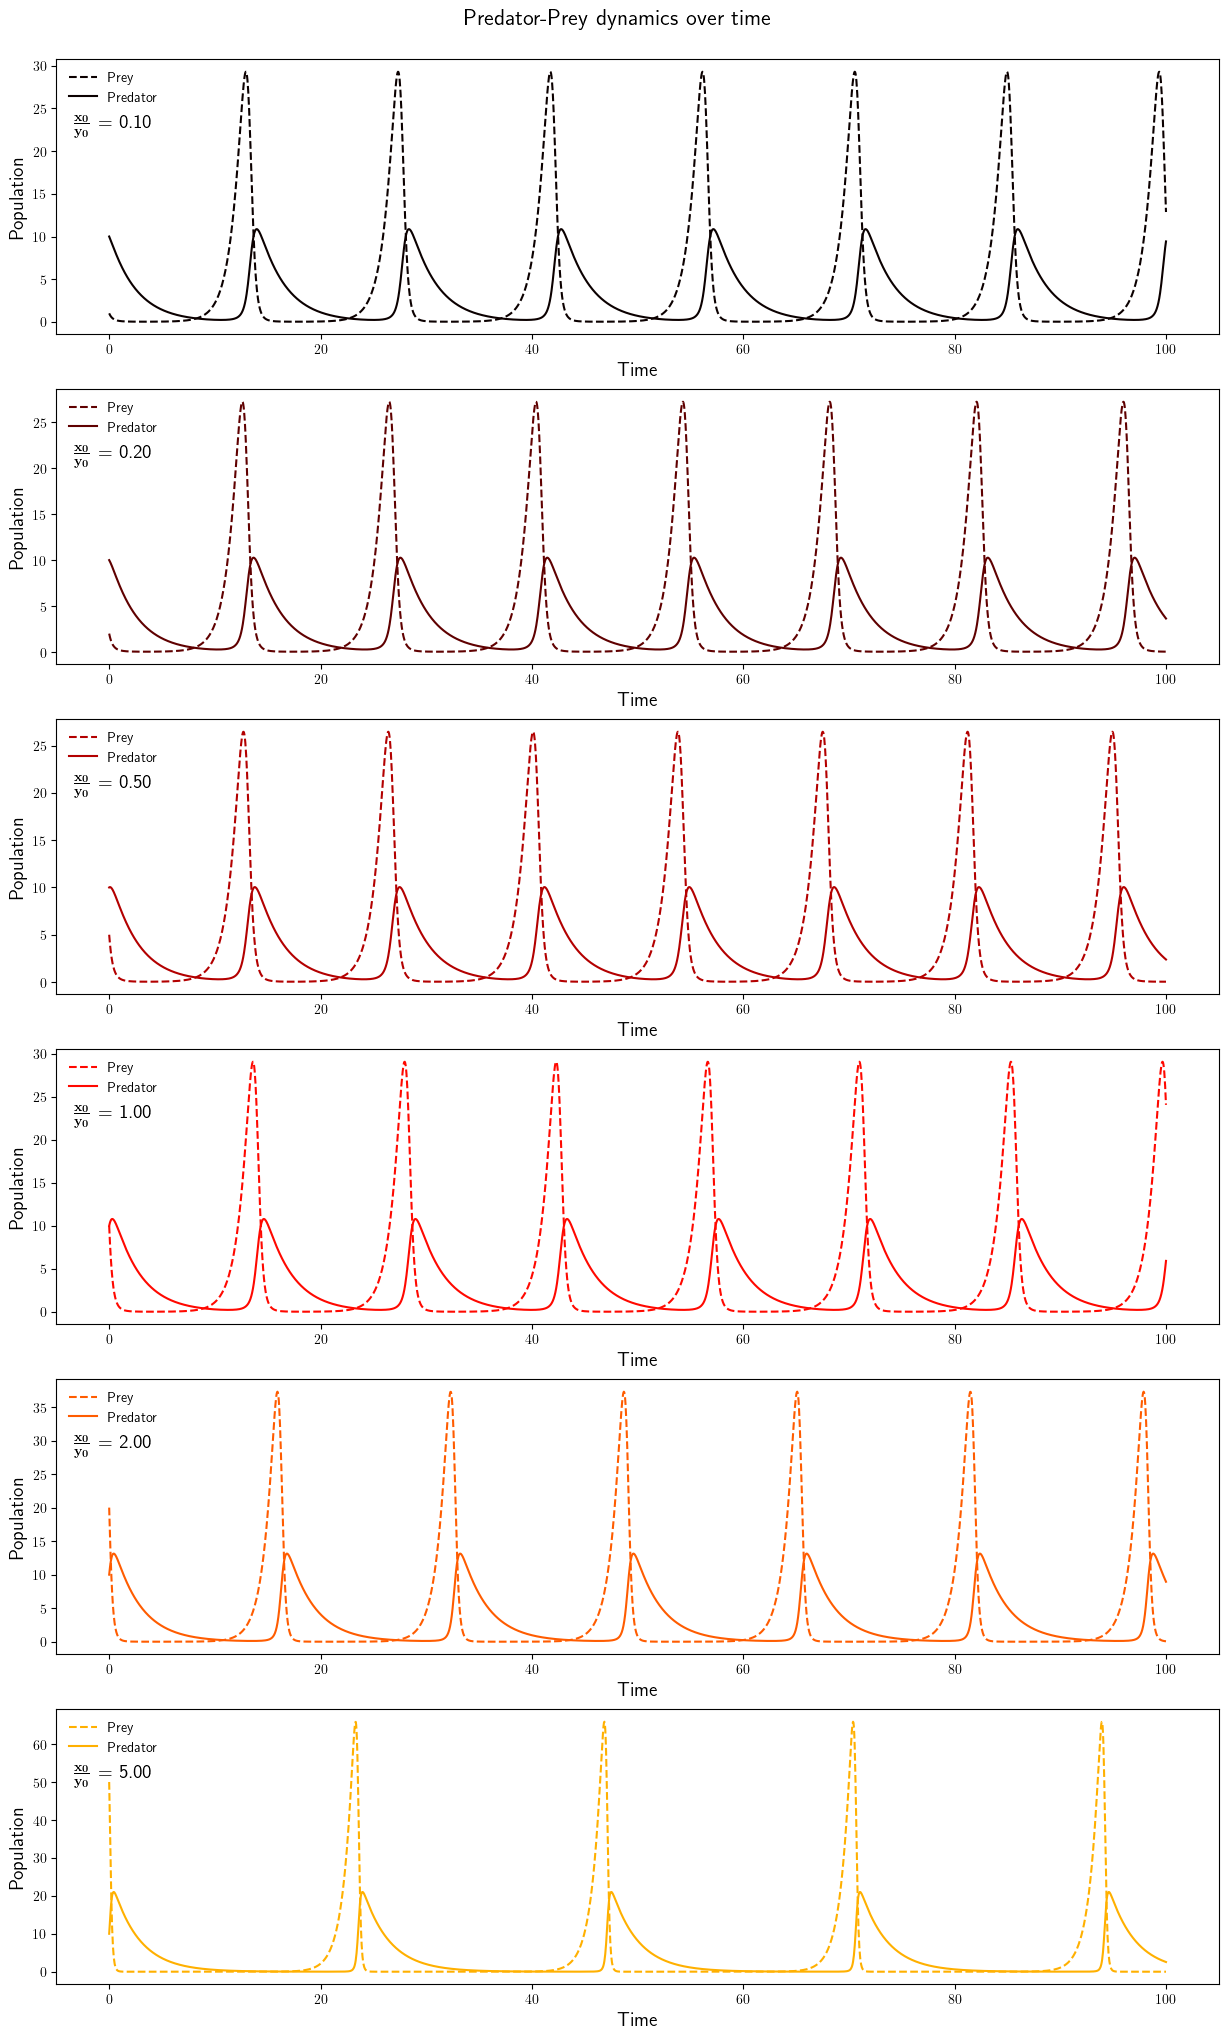

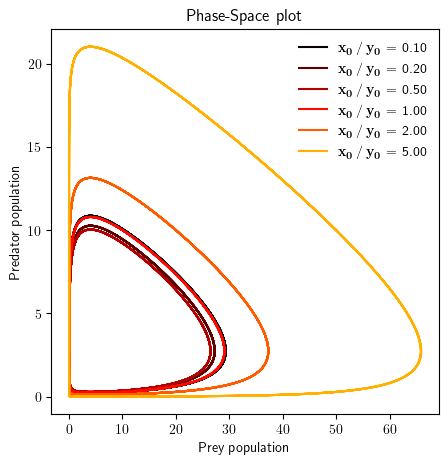

In [5]:
#Changing the initial populations

#Getting a nice colormap
tab= plt.get_cmap('hot')
colors = iter(tab(np.linspace(0,1,9)))

#Create the subplots
fig1, axs = plt.subplots(6, 1, figsize=(15, 25))

#Specify general title and position
tit = fig1.suptitle('Predator-Prey dynamics over time', fontsize = 16)
tit.set_position([0.5, 0.9])

#Define the ratio of the prey and predator population array
ratioprey = np.array([1/10, 1/5, 1/2, 1, 2, 5])

for k in range(0,len(ratioprey)):
    initial = [ratioprey[k]*10, 10] #[initial_prey, initial_predator]
    #Solve the ode system
    model = odeint(predator_prey, initial, t, args=(params,))
    x = model[:,0]
    y = model[:,1]
    
    #Get next color in colormap
    c=next(colors)
    
    #Define subplot configurations
    axs[k].plot(t, x,'--', color=c, label = 'Prey')
    axs[k].plot(t, y,'-', color=c, label = 'Predator ')
    axs[k].legend(loc='upper left', frameon=False)
    axs[k].set_xlabel('Time', fontsize = 14)
    axs[k].set_ylabel('Population', rotation='vertical', fontsize = 14)
    
    #Include the x0/y0 ratio in LaTeX interpreter
    axs[k].text(0.015, 0.75, r'$\bf{\frac{x_0}{y_0}}$ = %.2f' % ratioprey[k], fontsize=14, transform=axs[k].transAxes)

    #Include phase-space plot 
    fig2 = plt.figure(2, figsize=(5,5))
    plt.plot(x,y, color=c, label = r'$\bf{x_0 \mathbin{/} y_0}$ = %.2f' % ratioprey[k])
    plt.title('Phase-Space plot')
    plt.xlabel('Prey population')
    plt.ylabel('Predator population')
    plt.legend(loc='upper right', frameon=False)